# Applied AI Research Seminar: Group Assignment

|Nr|**Name**|**Student ID**|
|--|--------|--------------|
|1.|  Katja Tophoff      |     13378678         | 
|2.|     Nicky Trijbits   |       12857815       |  
|3.|    Albin Lindqvist    |       13986236       | 
|4.| Helena Murniece | 13251422 |


Below is the code used, it is comprised of 3 larger parts. First is the data exploration, where we investigate the dataset, secondly the ResNet50 model is developed, followed by, lastly, the MobileNetV2 model development.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_train = pd.read_csv("SemArt/semart_train.csv", sep="	", encoding="unicode_escape")
df_train.columns = df_train.columns.str.lower()

# split the 'technique' column into 'technique_only' and 'size_only'
df_train[["technique_only", "size_only"]] = df_train["technique"].str.split(
    ",", 1, expand=True
)

# strip any whitespace characters from the new columns
df_train["technique_only"] = df_train["technique_only"].str.strip()
df_train["size_only"] = df_train["size_only"].str.strip()

df_test = pd.read_csv("SemArt/semart_test.csv", sep="	", encoding="unicode_escape")
df_test.columns = df_test.columns.str.lower()

df_train

/var/folders/y6/2mg4f4gx0955xc9_y_q271nr0000gp/T/ipykernel_1620/1509921517.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_train[['technique_only', 'size_only']] = df_train['technique'].str.split(',', 1, expand=True)


,image_file,description,author,title,technique,date,type,school,timeframe,technique_only,size_only
0,19873-1darmst.jpg,"The Meyer or Darmstadt Madonna is the last, mo...","HOLBEIN, Hans the Younger",Darmstadt Madonna,"Oil on limewood, 147 x 102 cm",1526 and after 1528,religious,German,1501-1550,Oil on limewood,147 x 102 cm
1,18759-guard301.jpg,Whereas Canaletto incorporates classically ins...,"GUARDI, Francesco",Landscape with a Fisherman's Tent,"Oil on canvas, 49 x 77 cm",1770-75,landscape,Italian,1751-1800,Oil on canvas,49 x 77 cm
2,04589-temptati.jpg,In this painting the refinement of the colouri...,"BILIVERT, Giovanni",The Temptation of Charles and Ubalde,"Oil on copper, 37 x 28 cm",1629-30,religious,Italian,1601-1650,Oil on copper,37 x 28 cm
3,15104-magi.jpg,"The left side of the painting was cut, origina...",GEERTGEN tot Sint Jans,Adoration of the Magi,"Panel, 111 x 69 cm",1480-85,religious,Netherlandish,1451-1500,Panel,111 x 69 cm
4,36582-paolo_f1.jpg,The painting illustrates a famous episode from...,"SCHEFFER, Ary",The Ghosts of Paolo and Francesca Appear to Da...,"Oil on canvas, 167 x 234 cm",1835,other,Dutch,1801-1850,Oil on canvas,167 x 234 cm
...,...,...,...,...,...,...,...,...,...,...,...
19239,07228-canal515.jpg,This picture is a supreme example of a distinc...,CANALETTO,Venice: The Grand Canal from Palazzo Flangini ...,"Oil on canvas, 47 x 78 cm",c.1738,landscape,Italian,1701-1750,Oil on canvas,47 x 78 cm
19240,06294-fighting.jpg,Dutch realism was a matter not merely of imita...,"BROUWER, Adriaen",Peasants Fighting,"Oil on wood, 33 x 49 cm",1631-35,genre,Flemish,1601-1650,Oil on wood,33 x 49 cm
19241,21607-mytholo1.jpg,Lauri's speciality was the ideal landscape wit...,"LAURI, Filippo",Venus and Adonis,"Oil on copper, 18 x 29 cm",1650s,mythological,Italian,1651-1700,Oil on copper,18 x 29 cm
19242,02815-bacchant.jpg,Augustin was a French miniaturist who revived ...,"AUGUSTIN, Jean-Baptiste-Jacques",A Bacchante,"Ivory, diameter: 8 cm",1799,mythological,French,1751-1800,Ivory,diameter: 8 cm


# Summary statistics

## Authors

In [4]:
author_counts = df_train["author"].value_counts()
author_counts.describe()

count    3166.000000
mean        6.078332
std        15.812633
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       291.000000
Name: author, dtype: float64

In [5]:
# Replace all variations of 'UNKNOWN' in the 'author' column with 'UNKNOWN'
df_train["author"] = df_train["author"].str.replace(r"UNKNOWN.*", "UNKNOWN", regex=True)

author_counts = df_train["author"].value_counts()
author_counts.describe()

count    3149.000000
mean        6.111146
std        17.206322
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       418.000000
Name: author, dtype: float64

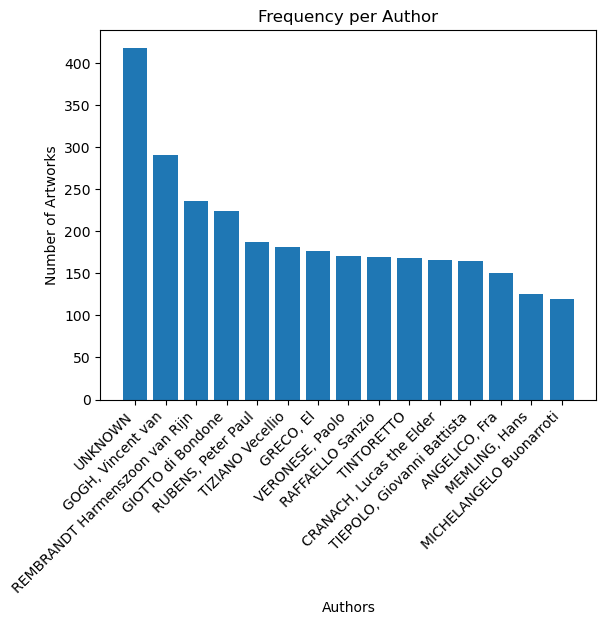

In [6]:
frequent_authors = author_counts.head(15)

plt.bar(frequent_authors.index, frequent_authors.values)
plt.xlabel("Authors")
plt.ylabel("Number of Artworks")
plt.title("Frequency per Author")
plt.xticks(rotation=45, ha="right")
plt.show()

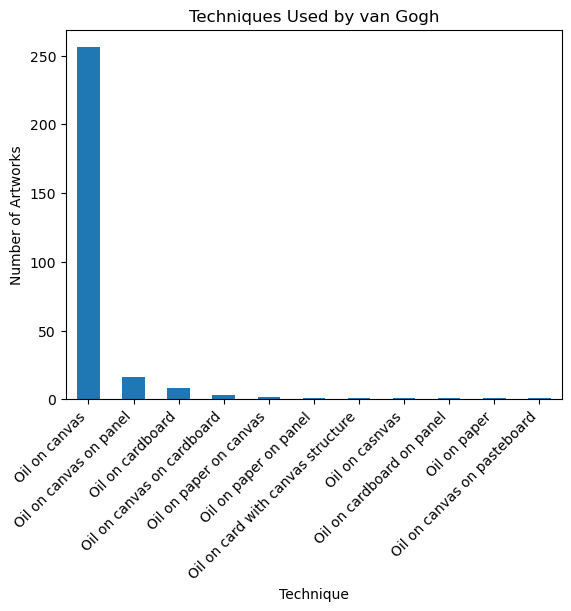

In [7]:
# analyze techniques used by a specific author
author_techniques = df_train[df_train["author"] == "GOGH, Vincent van"][
    "technique_only"
].value_counts()

# bar chart of techniques by a specific author
author_techniques.plot(kind="bar")
plt.title("Techniques Used by van Gogh")
plt.xlabel("Technique")
plt.ylabel("Number of Artworks")
plt.xticks(rotation=45, ha="right")
plt.show()

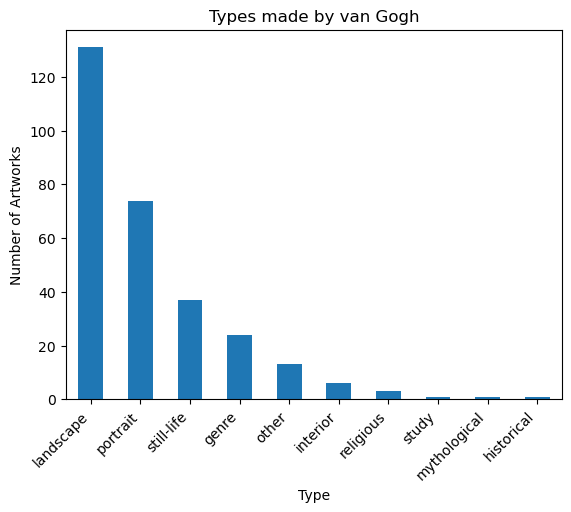

In [8]:
# analyze types of art made by a specific author
author_types = df_train[df_train["author"] == "GOGH, Vincent van"][
    "type"
].value_counts()

# bar chart of techniques by a specific author
author_types.plot(kind="bar")
plt.title("Types made by van Gogh")
plt.xlabel("Type")
plt.ylabel("Number of Artworks")
plt.xticks(rotation=45, ha="right")
plt.show()

## Techniques

In [9]:
technique_counts = df_train["technique"].value_counts()
technique_counts.describe()

count    12297.000000
mean         1.564935
std         17.031231
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1798.000000
Name: technique, dtype: float64

note: the 'technique' column consists of the technique and the size of the painting

### only technique

In [10]:
technique_only_counts = df_train["technique_only"].value_counts()
technique_only_counts.describe()

count     618.000000
mean       31.139159
std       389.879489
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      9085.000000
Name: technique_only, dtype: float64

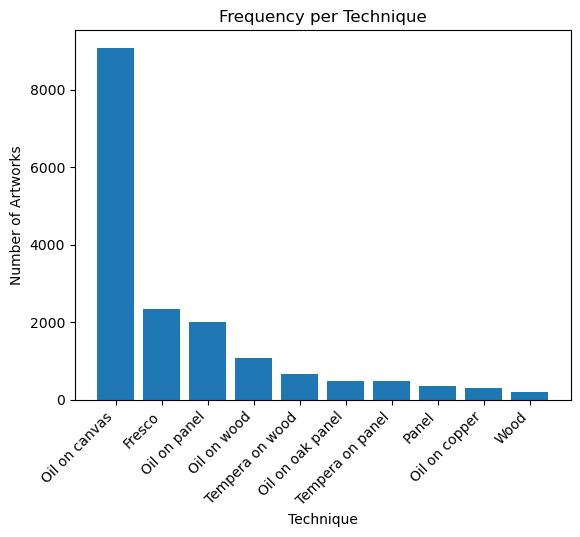

In [11]:
frequent_techniques = technique_only_counts.head(10)

plt.bar(frequent_techniques.index, frequent_techniques.values)
plt.xlabel("Technique")
plt.ylabel("Number of Artworks")
plt.title("Frequency per Technique")
plt.xticks(rotation=45, ha="right")
plt.show()

### only size

In [12]:
size_only_counts = df_train["size_only"].value_counts()
size_only_counts.describe()

count    9677.000000
mean        1.676656
std         1.875112
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        62.000000
Name: size_only, dtype: float64

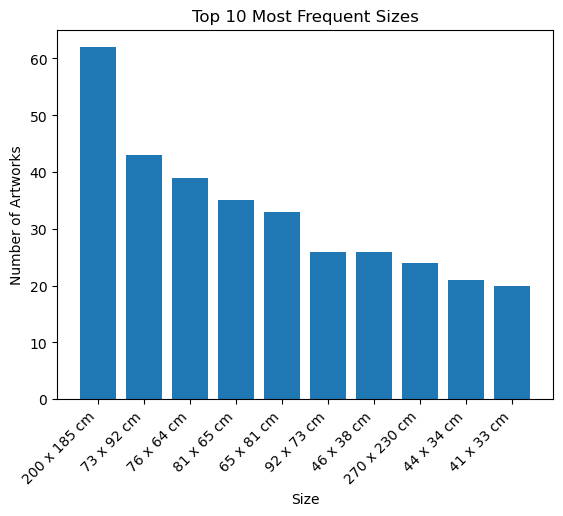

In [13]:
frequent_sizes = size_only_counts.head(10)

plt.bar(frequent_sizes.index, frequent_sizes.values)
plt.xlabel("Size")
plt.ylabel("Number of Artworks")
plt.title("Top 10 Most Frequent Sizes")
plt.xticks(rotation=45, ha="right")
plt.show()

In [14]:
# function to calculate the surface area from size_only string
def calculate_surface(size_str):
    if pd.isna(size_str):
        return None
    try:
        dimensions = (
            size_str.replace("cm", "").strip().split("x")
        )  # split length and witdth
        width = float(dimensions[0].strip())
        height = float(dimensions[1].strip())
        return width * height
    except (IndexError, ValueError):
        return None  # return None if there are any issues


df_train["surface"] = df_train["size_only"].apply(calculate_surface)


In [15]:
surface_counts = df_train["surface"].value_counts()
surface_counts.describe()

count    5716.000000
mean        2.468509
std         3.324854
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        70.000000
Name: surface, dtype: float64

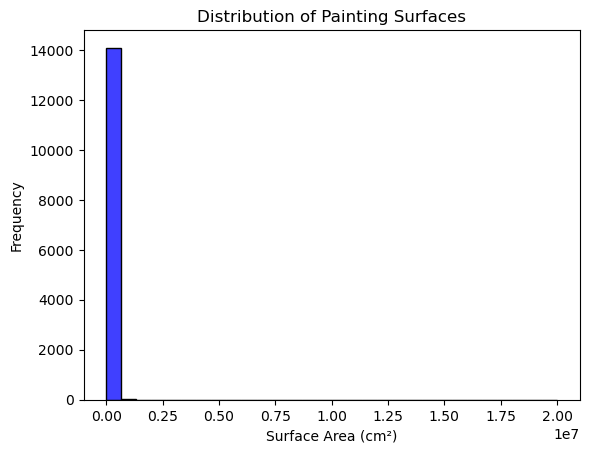

In [16]:
df_train_clean = df_train.dropna(subset=["surface"])

# plotting histogram
sns.histplot(df_train_clean["surface"], bins=30, color="blue")
plt.title("Distribution of Painting Surfaces")
plt.xlabel("Surface Area (cm²)")
plt.ylabel("Frequency")
plt.show()

not usefull, use logtransformation:

/var/folders/y6/2mg4f4gx0955xc9_y_q271nr0000gp/T/ipykernel_1620/2593646835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_clean['log_surface'] = np.log1p(df_train_clean['surface'])


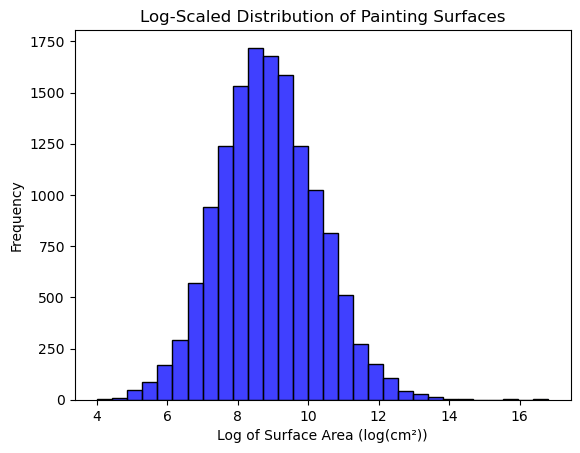

In [17]:
df_train_clean = df_train.dropna(subset=["surface"])

df_train_clean["log_surface"] = np.log1p(df_train_clean["surface"])

sns.histplot(df_train_clean["log_surface"], bins=30, color="blue")
plt.title("Log-Scaled Distribution of Painting Surfaces")
plt.xlabel("Log of Surface Area (log(cm²))")
plt.ylabel("Frequency")
plt.show()

## Type

In [18]:
type_counts = df_train["type"].value_counts()
type_counts.describe()

count      10.000000
mean     1924.400000
std      2203.901853
min        57.000000
25%       518.000000
50%      1278.000000
75%      2333.000000
max      7481.000000
Name: type, dtype: float64

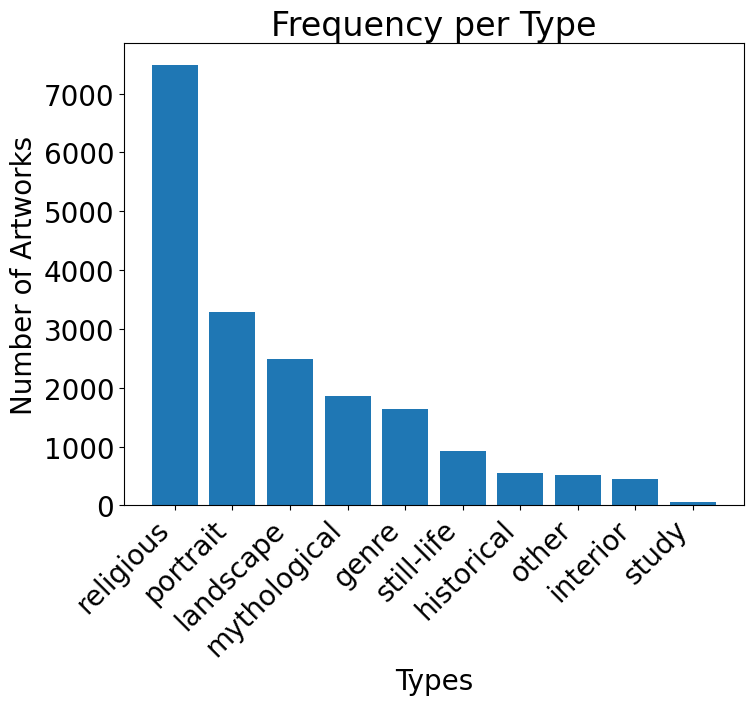

In [33]:
plt.figure(figsize=(8, 6))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Types", fontsize=20)
plt.ylabel("Number of Artworks", fontsize=20)
plt.title("Frequency per Type", fontsize=24)
plt.xticks(rotation=45, ha="right", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## School

In [21]:
school_counts = df_train["school"].value_counts()
school_counts.describe()

count      26.000000
mean      740.153846
std      1693.052739
min         5.000000
25%        24.500000
50%        78.500000
75%       362.500000
max      8011.000000
Name: school, dtype: float64

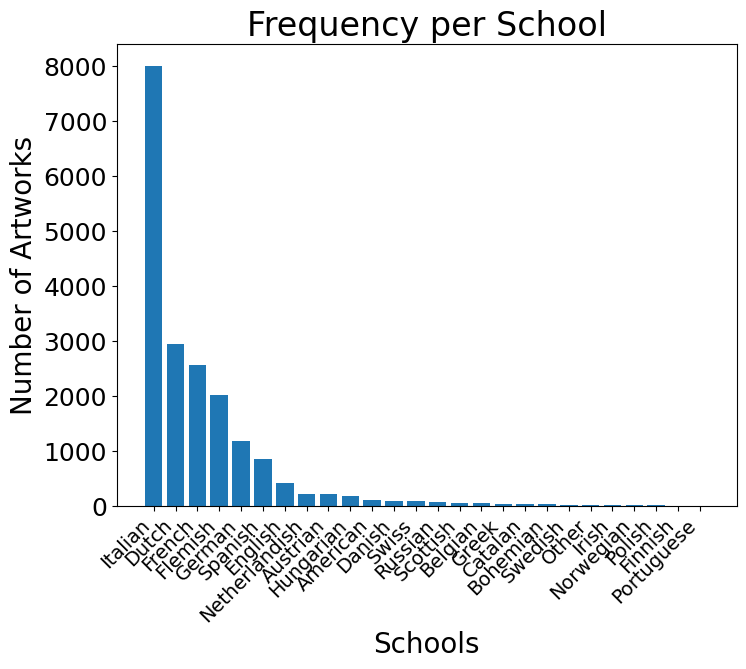

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(school_counts.index, school_counts.values)
plt.xlabel("Schools", fontsize=20)
plt.ylabel("Number of Artworks", fontsize=20)
plt.title("Frequency per School", fontsize=24)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=18)
plt.show()

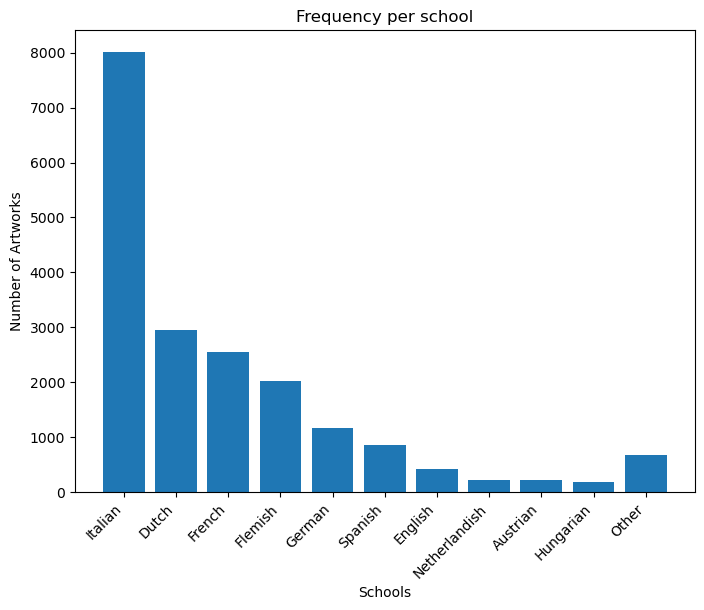

In [39]:
new_school_counts = school_counts.head(10)

# calculate the count of "Other" authors not in the top 10
other_count = school_counts[10:].sum()

# Append the "Other" count to the top authors
new_school_counts["Other"] = other_count

plt.figure(figsize=(8, 6))
plt.bar(new_school_counts.index, new_school_counts.values)
plt.xlabel("Schools")
plt.ylabel("Number of Artworks")
plt.title("Frequency per school")
plt.xticks(rotation=45, ha="right")
plt.show()

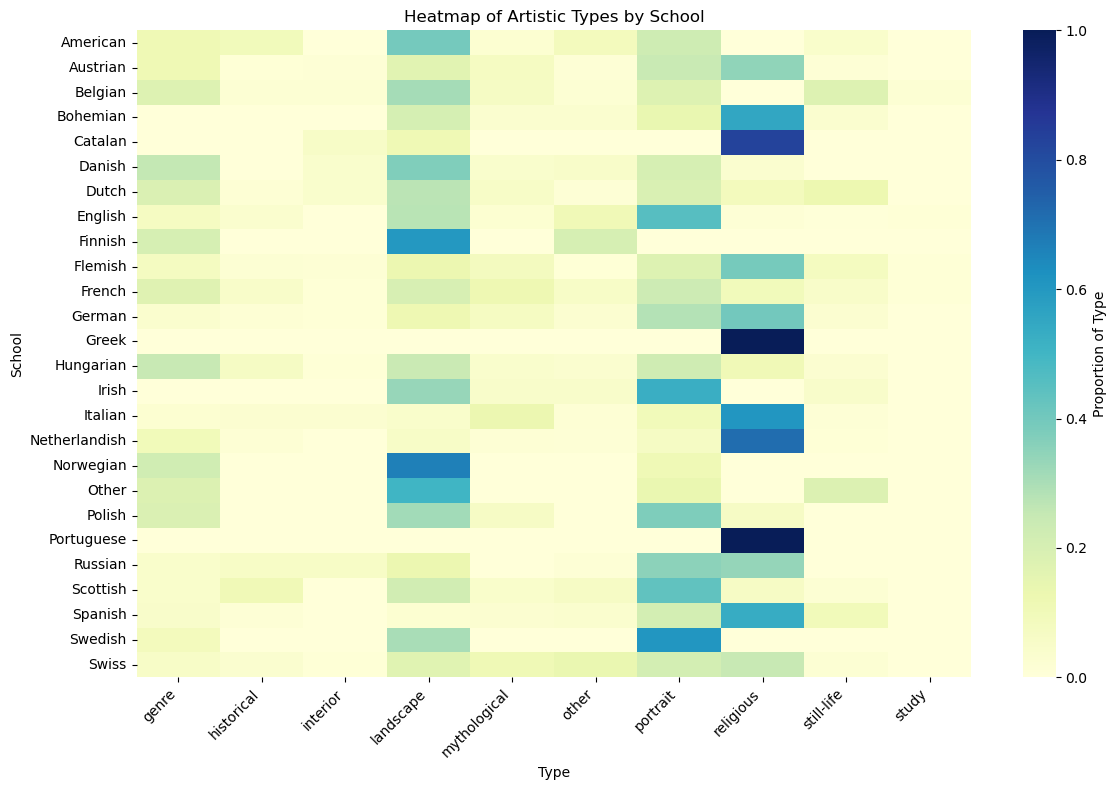

In [129]:
# group by school and type, and count
school_type_counts = df_train.groupby(["school", "type"]).size().unstack(fill_value=0)

# normalize counts
school_type_normalized = school_type_counts.div(school_type_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    school_type_normalized,
    cmap="YlGnBu",
    annot=False,
    cbar_kws={"label": "Proportion of Type"},
)
plt.title("Heatmap of Artistic Types by School")
plt.xlabel("Type")
plt.ylabel("School")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Timeframe

In [28]:
timeframe_counts = df_train["timeframe"].value_counts().sort_index()
timeframe_counts.describe()

count      22.000000
mean      874.727273
std      1010.487868
min         1.000000
25%        15.750000
50%       508.500000
75%      1547.500000
max      3404.000000
Name: timeframe, dtype: float64

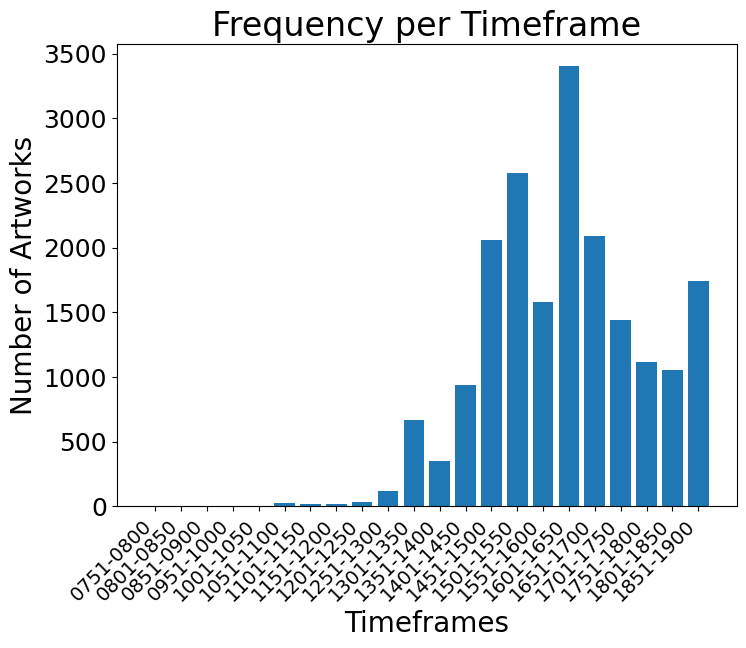

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(timeframe_counts.index, timeframe_counts.values)
plt.xlabel("Timeframes", fontsize=20)
plt.ylabel("Number of Artworks", fontsize=20)
plt.title("Frequency per Timeframe", fontsize=24)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.yticks(fontsize=18)
plt.show()

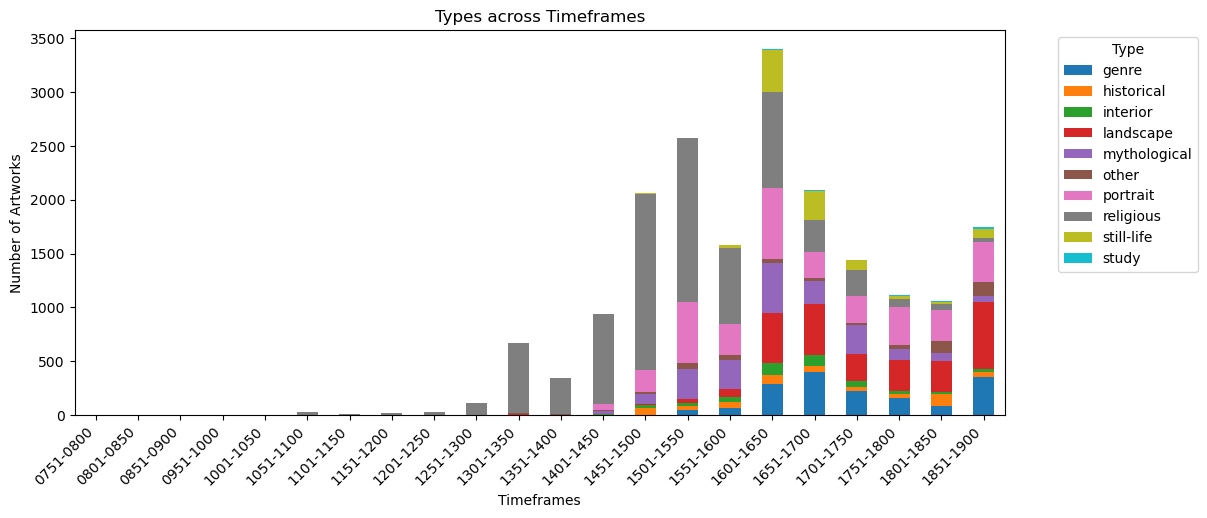

In [144]:
# group the data by timeframe and type, and count
genre_timeframe_counts = (
    df_train.groupby(["timeframe", "type"]).size().unstack(fill_value=0)
)

# stacked bar chart
genre_timeframe_counts.plot(kind="bar", stacked=True, figsize=(12, 5))
plt.title("Types across Timeframes")
plt.xlabel("Timeframes")
plt.ylabel("Number of Artworks")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [60]:
import pandas as pd

In [61]:
df = pd.read_csv("SemArt/semart_train.csv", sep="	", encoding="unicode_escape")
df.columns = df.columns.str.lower()

In [62]:
len(df["timeframe"].unique())

22

In [63]:
df.columns

Index(['image_file', 'description', 'author', 'title', 'technique', 'date',
       'type', 'school', 'timeframe'],
      dtype='object')

In [64]:
df.groupby("timeframe").size()

timeframe
0751-0800       2
0801-0850       5
0851-0900       3
0951-1000       4
1001-1050       1
1051-1100      26
1101-1150      14
1151-1200      21
1201-1250      29
1251-1300     116
1301-1350     670
1351-1400     347
1401-1450     938
1451-1500    2059
1501-1550    2576
1551-1600    1582
1601-1650    3404
1651-1700    2088
1701-1750    1444
1751-1800    1114
1801-1850    1056
1851-1900    1745
dtype: int64

In [65]:
df.groupby("school").size().sort_values()

school
Finnish             5
Portuguese          5
Polish             16
Norwegian          18
Irish              21
Other              22
Swedish            23
Bohemian           29
Catalan            35
Greek              37
Belgian            45
Scottish           46
Russian            68
Swiss              89
Danish             94
American          113
Hungarian         178
Austrian          216
Netherlandish     217
English           411
Spanish           852
German           1173
Flemish          2016
French           2556
Dutch            2948
Italian          8011
dtype: int64

In [66]:
df.groupby("type").size().sort_values()

type
study             57
interior         452
other            509
historical       545
still-life       926
genre           1630
mythological    1862
landscape       2490
portrait        3292
religious       7481
dtype: int64

In [67]:
technique_df = df.groupby("technique").size().to_frame()

# Development
## Setup
Setting up configurations such as label encoding and different types of data sets

In [68]:
from enum import Enum


class DataSetEnum(Enum):
    TRAIN = "train"
    TEST = "test"
    VALIDATION = "val"


class OutputEnum(Enum):
    TIMEFRAME = "timeframe"
    SCHOOL = "school"
    TYPE = "type"


timeframe_encoder = {
    "0801-0850": 0,
    "0851-0900": 0,
    "0751-0800": 0,
    "0951-1000": 0,
    "1001-1050": 0,
    "1051-1100": 0,
    "1101-1150": 0,
    "1151-1200": 0,
    "1201-1250": 0,
    "1251-1300": 0,
    "1301-1350": 0,
    "1351-1400": 0,
    "1401-1450": 1,
    "1451-1500": 1,
    "1501-1550": 2,
    "1551-1600": 2,
    "1601-1650": 3,
    "1651-1700": 3,
    "1701-1750": 4,
    "1751-1800": 4,
    "1801-1850": 5,
    "1851-1900": 5,
}

school_encoder = {
    "Finnish": 0,
    "Portuguese": 0,
    "Polish": 0,
    "Norwegian": 0,
    "Irish": 0,
    "Other": 0,
    "Swedish": 0,
    "Bohemian": 0,
    "Catalan": 0,
    "Greek": 0,
    "Belgian": 0,
    "Scottish": 0,
    "Russian": 0,
    "Swiss": 0,
    "Danish": 0,
    "American": 0,
    "Hungarian": 0,
    "Austrian": 0,
    "Netherlandish": 0,
    "English": 0,
    "Spanish": 1,
    "German": 2,
    "Flemish": 3,
    "French": 4,
    "Dutch": 5,
    "Italian": 6,
}

type_encoder = {
    "study": 0,
    "interior": 0,
    "other": 0,
    "historical": 0,
    "still-life": 0,
    "genre": 1,
    "mythological": 2,
    "landscape": 3,
    "portrait": 4,
    "religious": 5,
}

## ResNet50
Building the model, we are using a pre-trained CNN model called resnet.

In [69]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class CNN(nn.Module):
    def __init__(self, output_dim: int):
        super(CNN, self).__init__()
        self.output_dim = output_dim
        self.resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
        self.resnet.requires_grad_(False)
        self.resnet.fc = nn.Linear(2048, output_dim)
        self.resnet.fc.requires_grad_(True)

    def forward(self, x):
        if len(x.shape) == 3:
            x = x.unsqueeze(0)
        x = self.resnet(x)
        return x


Using device: cuda


## Dataloader

We make use of a data loader that dynamically loads the dataset so that we avoid loading all of the images (training set has over 19k images) into memory. We also define some transformations, that are following how resnet was trained. For the training set we are doing some data augmentation to avoid overfitting while training.

In [70]:
from pathlib import Path
import numpy as np
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms
from PIL import Image


class ImageDataset(Dataset):
    def __init__(
        self,
        data_set: DataSetEnum,
        output: OutputEnum,
        encoder: dict[str, int] | None = None,
    ):
        self.data_set = data_set
        self.output = output
        self.data = pd.read_csv(
            f"SemArt/semart_{data_set.value}.csv", sep="	", encoding="unicode_escape"
        )
        self.data.columns = self.data.columns.str.lower()
        self._base_path = Path() / "SemArt" / "Images"
        self.transform = transforms.Compose(
            [
                # Get the values from here: https://pytorch.org/vision/0.18/models/generated/torchvision.models.resnet50.html#torchvision.models.resnet50
                transforms.Resize(232),
                # Data augmentation, randomly crop the image and flip it horizontally
                # only for the training set
                transforms.RandomCrop(224)
                if data_set == DataSetEnum.TRAIN
                else transforms.CenterCrop(224),
                transforms.RandomHorizontalFlip()
                if data_set == DataSetEnum.TRAIN
                else transforms.Lambda(lambda x: x),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )
        if not encoder:
            print("Using standard encoder")
            self.encoder = (
                timeframe_encoder
                if output == OutputEnum.TIMEFRAME
                else school_encoder
                if output == OutputEnum.SCHOOL
                else type_encoder
                if output == OutputEnum.TYPE
                else None
            )
        else:
            self.encoder = encoder
        assert self.encoder is not None, "Invalid output type"
        self.data = self.data[self.data[self.output.value].isin(self.encoder.keys())]
        self.data = self.data.reset_index(drop=True)
        self._output_dim = len(set(self.encoder.values()))

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, idx: int) -> tuple[torch.Tensor, int]:
        # Set label
        label = -1
        label = self.encoder[self.data[self.output.value][idx]]  # type: ignore

        assert label >= 0, "No label found, invalid output type"

        # load image
        raw_image = Image.open(
            str((self._base_path / str(self.data["image_file"][idx])).resolve())
        ).convert("RGB")
        image: torch.Tensor = self.transform(raw_image)  # type: ignore
        image = image.to(device)
        return image, label


### Oversampling
Because the dataset is imbalanced in the classes that we are training on we have to use oversampling, here we create a `WeightedRandomSampler` that create probabilities based on how common a class is, this is only used for the training set.

In [71]:
def get_weights_for_balanced_sampler(dataset: ImageDataset) -> np.ndarray:
    output_dim = dataset._output_dim
    class_sizes = np.zeros(output_dim)
    encoder = dataset.encoder
    assert encoder is not None
    for key, val in encoder.items():
        class_sizes[val] += len(dataset.data[dataset.data[dataset.output.value] == key])

    weights = np.zeros(len(dataset))
    for idx, row in enumerate(dataset.data.iterrows()):
        weights[idx] = len(dataset) / class_sizes[encoder[row[1][dataset.output.value]]]

    return weights


### Training

In [72]:
from torch.utils.tensorboard.writer import SummaryWriter

# Use tensorboard to visualize the training process
writer = SummaryWriter()

In [91]:
import torch.nn.functional as F
import matplotlib.pyplot as plt


# Helper function to plot the class prediction
def plot_class_prediction(net, images, labels):
    preds = net(images)
    probs = F.softmax(preds, dim=1)
    fig = plt.figure(figsize=(6, 6))
    labels = labels.cpu().numpy()
    images = images.cpu()
    probs = probs.cpu().detach().numpy()
    for idx in np.arange(8):
        ax = fig.add_subplot(2, 4, idx + 1, xticks=[], yticks=[])
        image = images[idx].numpy().transpose(1, 2, 0)
        image = (image - image.min()) / (image.max() - image.min())
        ax.imshow(image)
        ax.set_title(
            f"{labels[idx]} -> {probs[idx].argmax()}({probs[idx].max():.2f})",
            color=("green" if probs[idx].argmax() == labels[idx] else "red"),
        )
    return fig

In [74]:
from IPython.display import clear_output
from tqdm.notebook import tqdm


# TRAIN
def train(model, train_dataloader, criterion, optimizer, writer, epoch):
    size = len(train_dataloader)
    model.train()
    try:
        for batch, (images, labels) in tqdm(
            enumerate(train_dataloader),
            total=size,
            leave=False,
            desc=f"Training {epoch + 1}",
            position=1,
        ):
            pred = model(images)
            labels = labels.to(device)
            loss = criterion(pred, labels)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            if batch % 10 == 0:
                # accuracy
                accuracy = (pred.argmax(1) == labels).sum().item() / len(labels)
                writer.add_scalars(
                    "Train/Loss", {"train": loss.item()}, batch + size * epoch
                )
                writer.add_scalars(
                    "Train/Accuracy", {"train": accuracy}, batch + size * epoch
                )
                # print(
                #     f"{batch}/{size} - train loss: {loss.item():.4f} - train accuracy: {accuracy:.4f}"
                # )

    except KeyboardInterrupt:
        print("Training interrupted")
        torch.save(model.state_dict(), "model.pth")
        raise KeyboardInterrupt


# TEST
def test(model, test_dataloader, criterion, writer, epoch):
    size = len(test_dataloader)
    model.eval()
    with torch.no_grad():
        confusion_matrix = np.zeros(
            (test_dataloader.dataset._output_dim, test_dataloader.dataset._output_dim)
        )
        random_index = np.random.randint(0, size)
        for batch, (images, labels) in tqdm(
            enumerate(test_dataloader),
            total=size,
            leave=False,
            desc=f"Testing {epoch + 1}",
            position=1,
        ):
            pred = model(images)
            labels = labels.to(device)
            loss = criterion(pred, labels)
            accuracy = (pred.argmax(1) == labels).sum().item() / len(labels)
            writer.add_scalars("Test/Loss", {"test": loss.item()}, batch + size * epoch)
            writer.add_scalars(
                "Test/Accuracy", {"test": accuracy}, batch + size * epoch
            )
            # print(
            #     f"{batch}/{size} - test loss: {loss.item():.4f} - test accuracy: {accuracy:.4f}"
            # )

            # confusion matrix
            for idx, (p, l) in enumerate(zip(pred.argmax(1), labels)):
                confusion_matrix[l.item(), p.item()] += 1

            if batch == random_index:
                writer.add_figure(
                    "Class Prediction",
                    plot_class_prediction(model, images, labels),
                    epoch,
                    close=True,
                )

        # plot confusion matrix
        fig = plt.figure()
        plt.imshow(confusion_matrix, cmap="viridis")
        plt.colorbar()
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        writer.add_figure("Confusion Matrix", fig, epoch, close=True)


### Validation
We calculate some metrics on the validation set and show some examples

In [75]:
def validate(model, validation_dataset: DataLoader, criterion):
    # Validation
    model.eval()
    test_dataloader = validation_dataset

    running_loss = 0.0
    running_accuracy = 0.0
    running_precision_numerator = {}
    running_precision_denominator = {}
    with torch.no_grad():
        for batch_n, (images, labels) in enumerate(
            tqdm(test_dataloader, total=len(test_dataloader), leave=False)
        ):
            pred = model(images)
            labels = labels.to(device)
            loss = criterion(pred, labels)
            running_loss += loss.item()
            running_accuracy += (pred.argmax(1) == labels).sum().item() / len(labels)
            for idx, (p, l) in enumerate(zip(pred.argmax(1), labels)):
                if l.item() not in running_precision_numerator:
                    running_precision_numerator[l.item()] = 0
                    running_precision_denominator[l.item()] = 0
                running_precision_numerator[l.item()] += p.item() == l.item()
                running_precision_denominator[l.item()] += 1

    print(f"Test loss: {running_loss / len(test_dataloader):.3f}")
    print(f"Test accuracy: {running_accuracy / len(test_dataloader):.3f}")

    return (
        running_accuracy / len(test_dataloader),
        running_loss / len(test_dataloader),
        {
            k: running_precision_numerator[k] / running_precision_denominator[k]
            for k in running_precision_numerator
            if running_precision_denominator[k] > 0
        },
    )

In [76]:
criterion = nn.CrossEntropyLoss()
criterion.to(device)

CrossEntropyLoss()

In [77]:
def train_and_validation(model_class, encoder: dict[str, int], output: OutputEnum):
    train_dataset = ImageDataset(DataSetEnum.TRAIN, output, encoder)
    weights = get_weights_for_balanced_sampler(train_dataset)
    train_dataloader = DataLoader(
        train_dataset,
        batch_size=64,
        sampler=WeightedRandomSampler(weights, len(weights)),
    )
    test_dataset = ImageDataset(DataSetEnum.TEST, output, encoder)
    test_dataloader = DataLoader(test_dataset, batch_size=64)

    model = model_class(train_dataset._output_dim)
    model.to(device)
    params = model.parameters()
    # Optimizer parameters is same as Adam default in tensorflow
    optimizer = torch.optim.Adam(params, eps=1e-07)

    epochs = 10
    for epoch in tqdm(
        range(epochs), desc="Epochs", leave=True, total=epochs, position=0
    ):
        train(model, train_dataloader, criterion, optimizer, writer, epoch)
        test(model, test_dataloader, criterion, writer, epoch)

    validation_dataset = ImageDataset(DataSetEnum.VALIDATION, output, encoder)
    validation_dataloader = DataLoader(validation_dataset, batch_size=64)
    accuracy, loss, _ = validate(model, validation_dataloader, criterion)

    torch.save(
        model.state_dict(),
        f"model_trained_{output.value}_{test_dataset._output_dim}.pth",
    )
    return accuracy, loss

In [78]:
# School encodings
school_encoding_one = {
    "American": 0,
    "Austrian": 1,
    "Belgian": 2,
    "Bohemian": 3,
    "Danish": 4,
    "Dutch": 5,
    "English": 6,
    "Flemish": 7,
    "French": 8,
    "German": 9,
    "Hungarian": 10,
    "Irish": 11,
    "Italian": 12,
    "Netherlandish": 13,
    "Other": 14,
    "Polish": 15,
    "Portuguese": 16,
    "Russian": 17,
    "Scottish": 18,
    "Spanish": 19,
    "Swedish": 20,
    "Swiss": 21,
    "Catalan": 22,
    "Finnish": 23,
    "Norwegian": 24,
    "Greek": 25,
}

school_encoding_two = {
    "American": 0,
    "Austrian": 4,
    "Belgian": 4,
    "Bohemian": 3,
    "Danish": 1,
    "Dutch": 4,
    "English": 4,
    "Flemish": 4,
    "French": 4,
    "German": 4,
    "Hungarian": 3,
    "Irish": 4,
    "Italian": 2,
    "Netherlandish": 4,
    "Other": 5,
    "Polish": 3,
    "Portuguese": 2,
    "Russian": 3,
    "Scottish": 4,
    "Spanish": 2,
    "Swedish": 1,
    "Swiss": 4,
    "Catalan": 2,
    "Finnish": 1,
    "Norwegian": 1,
    "Greek": 2,
}

type_encoding = {
    "genre": 0,
    "historical": 1,
    "interior": 2,
    "landscape": 3,
    "mythological": 4,
    "other": 5,
    "portrait": 6,
    "religious": 7,
    "still-life": 8,
    "study": 9,
}

timeframe_encoding_one = {
    "0801-0850": 0,
    "0851-0900": 0,
    "0751-0800": 0,
    "0951-1000": 0,
    "1001-1050": 0,
    "1051-1100": 0,
    "1101-1150": 0,
    "1151-1200": 0,
    "1201-1250": 0,
    "1251-1300": 0,
    "1301-1350": 0,
    "1351-1400": 0,
    "1401-1450": 1,
    "1451-1500": 2,
    "1501-1550": 3,
    "1551-1600": 4,
    "1601-1650": 5,
    "1651-1700": 6,
    "1701-1750": 7,
    "1751-1800": 8,
    "1801-1850": 9,
    "1851-1900": 10,
}

timeframe_encoding_two = {
    "0801-0850": 0,
    "0851-0900": 0,
    "0751-0800": 0,
    "0951-1000": 0,
    "1001-1050": 0,
    "1051-1100": 0,
    "1101-1150": 0,
    "1151-1200": 0,
    "1201-1250": 0,
    "1251-1300": 0,
    "1301-1350": 0,
    "1351-1400": 0,
    "1401-1450": 1,
    "1451-1500": 1,
    "1501-1550": 2,
    "1551-1600": 2,
    "1601-1650": 3,
    "1651-1700": 3,
    "1701-1750": 4,
    "1751-1800": 4,
    "1801-1850": 5,
    "1851-1900": 5,
}

In [ ]:
results = pd.DataFrame(columns=["Accuracy", "Loss"])

acc, loss = train_and_validation(CNN, school_encoding_one, OutputEnum.SCHOOL)
results.loc["School Non-grouped"] = [acc, loss]

acc, loss = train_and_validation(CNN, school_encoding_two, OutputEnum.SCHOOL)
results.loc["School Grouped"] = [acc, loss]

acc, loss = train_and_validation(CNN, type_encoding, OutputEnum.TYPE)
results.loc["Type Encoding"] = [acc, loss]

acc, loss = train_and_validation(CNN, timeframe_encoding_one, OutputEnum.TIMEFRAME)
results.loc["Timeframe Non-grouped"] = [acc, loss]

acc, loss = train_and_validation(CNN, timeframe_encoding_two, OutputEnum.TIMEFRAME)
results.loc["Timeframe Grouped"] = [acc, loss]


In [262]:
results

,Accuracy,Loss
School Non-grouped,0.357312,1.968696
School Grouped,0.617729,0.899005
Type Encoding,0.653043,1.028588
Timeframe Non-grouped,0.457455,1.471065
Timeframe Grouped,0.632721,0.947086


In [263]:
results.to_csv("results.csv")

## Report Code
Below is code that was used to generate statistics and figures for the report and presenation

In [26]:
# Load the validation dataset
validation_dataset = ImageDataset(
    DataSetEnum.VALIDATION, OutputEnum.TIMEFRAME, timeframe_encoding_two
)
validation_dataloader = DataLoader(validation_dataset, batch_size=64)
# Load the model_trained_timeframe_6.pth model
model = CNN(6)
model.load_state_dict(torch.load("model_trained_timeframe_6.pth", weights_only=True))
model.eval()
model.to(device)
# Show the
confusion_matrix = np.zeros((6, 6))
for batch, (images, labels) in enumerate(validation_dataloader):
    pred = model(images)
    # confusion matrix
    for idx, (p, l) in enumerate(zip(pred.argmax(1), labels)):
        confusion_matrix[l.item(), p.item()] += 1

In [36]:
reverse_encoder = {
    0: "0801-1400",
    1: "1401-1500",
    2: "1501-1600",
    3: "1601-1700",
    4: "1701-1800",
    5: "1801-1900",
}

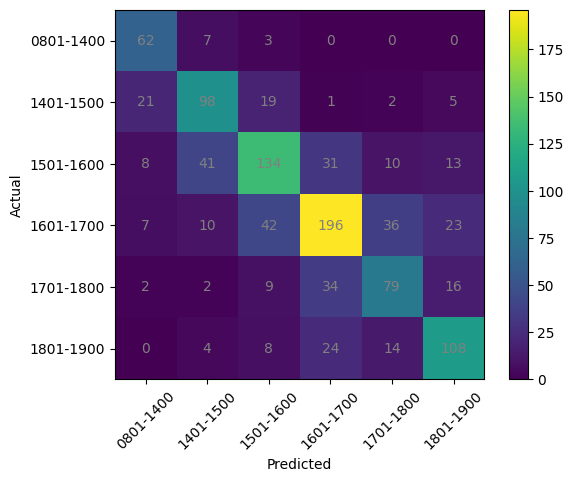

In [37]:
plt.imshow(confusion_matrix, cmap="viridis")
# Add the numbers to the plot
for i in range(6):
    for j in range(6):
        plt.text(
            j, i, int(confusion_matrix[i, j]), ha="center", va="center", color="grey"
        )
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=range(6), labels=[reverse_encoder[i] for i in range(6)], rotation=45)
plt.yticks(ticks=range(6), labels=[reverse_encoder[i] for i in range(6)])
plt.show()


In [ ]:
models_ = [
    ("model_trained_school_26.pth", school_encoding_one, OutputEnum.SCHOOL),
    ("model_trained_school_6.pth", school_encoding_two, OutputEnum.SCHOOL),
    ("model_trained_type_10.pth", type_encoding, OutputEnum.TYPE),
    ("model_trained_timeframe_11.pth", timeframe_encoding_one, OutputEnum.TIMEFRAME),
    ("model_trained_timeframe_6.pth", timeframe_encoding_two, OutputEnum.TIMEFRAME),
]
precisions = {}
for model_path, encoder, output in models_:
    model = CNN(len(set(encoder.values())))
    model.load_state_dict(torch.load(model_path, weights_only=True))
    model.eval()
    model.to(device)
    validation_dataset = ImageDataset(DataSetEnum.VALIDATION, output, encoder)
    validation_dataloader = DataLoader(validation_dataset, batch_size=64)
    _, _, precision = validate(model, validation_dataloader, criterion)
    precisions[model_path] = precision

In [82]:
for precision in precisions:
    for key in sorted(precisions[precision], key=lambda x: x):
        print(f"{precision} - {key}: {precisions[precision][key]:.3f}")

model_trained_school_26.pth - 0: 0.300
model_trained_school_26.pth - 1: 0.200
model_trained_school_26.pth - 2: 0.000
model_trained_school_26.pth - 3: 1.000
model_trained_school_26.pth - 4: 0.167
model_trained_school_26.pth - 5: 0.373
model_trained_school_26.pth - 6: 0.381
model_trained_school_26.pth - 7: 0.354
model_trained_school_26.pth - 8: 0.219
model_trained_school_26.pth - 9: 0.424
model_trained_school_26.pth - 10: 0.182
model_trained_school_26.pth - 11: 0.000
model_trained_school_26.pth - 12: 0.396
model_trained_school_26.pth - 13: 0.353
model_trained_school_26.pth - 14: 0.500
model_trained_school_26.pth - 16: 0.000
model_trained_school_26.pth - 17: 0.167
model_trained_school_26.pth - 18: 0.000
model_trained_school_26.pth - 19: 0.500
model_trained_school_26.pth - 21: 0.000
model_trained_school_26.pth - 22: 1.000
model_trained_school_26.pth - 24: 0.000
model_trained_school_6.pth - 0: 0.300
model_trained_school_6.pth - 1: 0.429
model_trained_school_6.pth - 2: 0.660
model_trained_sc

In [85]:
for model_path, encoder, output in models_:
    model = CNN(len(set(encoder.values())))
    model.load_state_dict(torch.load(model_path, weights_only=True))
    model.eval()
    model.to(device)
    train_dataset = ImageDataset(DataSetEnum.TRAIN, output, encoder)
    train_dataloader = DataLoader(train_dataset, batch_size=64)
    test_dataset = ImageDataset(DataSetEnum.TEST, output, encoder)
    test_dataloader = DataLoader(test_dataset, batch_size=64)
    running_train_accuracy = 0.0
    running_train_loss = 0.0
    for images, labels in train_dataloader:
        labels = labels.to(device)
        pred = model(images)
        loss = criterion(pred, labels)
        running_train_loss += loss.item()
        running_train_accuracy += (pred.argmax(1) == labels).sum().item() / len(labels)
    running_train_accuracy /= len(train_dataloader)
    running_train_loss /= len(train_dataloader)

    running_test_accuracy = 0.0
    running_test_loss = 0.0
    for images, labels in test_dataloader:
        labels = labels.to(device)
        pred = model(images)
        loss = criterion(pred, labels)
        running_test_loss += loss.item()
        running_test_accuracy += (pred.argmax(1) == labels).sum().item() / len(labels)
    running_test_accuracy /= len(test_dataloader)
    running_test_loss /= len(test_dataloader)

    print(
        f"{model_path} - Train accuracy: {running_train_accuracy:.3f} - Train loss: {running_train_loss:.3f}"
    )
    print(
        f"{model_path} - Test accuracy: {running_test_accuracy:.3f} - Test loss: {running_test_loss:.3f}"
    )


model_trained_school_26.pth - Train accuracy: 0.447 - Train loss: 1.711
model_trained_school_26.pth - Test accuracy: 0.389 - Test loss: 1.953
model_trained_school_6.pth - Train accuracy: 0.659 - Train loss: 0.821
model_trained_school_6.pth - Test accuracy: 0.643 - Test loss: 0.881
model_trained_type_10.pth - Train accuracy: 0.716 - Train loss: 0.828
model_trained_type_10.pth - Test accuracy: 0.672 - Test loss: 0.920
model_trained_timeframe_11.pth - Train accuracy: 0.564 - Train loss: 1.224
model_trained_timeframe_11.pth - Test accuracy: 0.473 - Test loss: 1.424
model_trained_timeframe_6.pth - Train accuracy: 0.677 - Train loss: 0.836
model_trained_timeframe_6.pth - Test accuracy: 0.625 - Test loss: 0.929


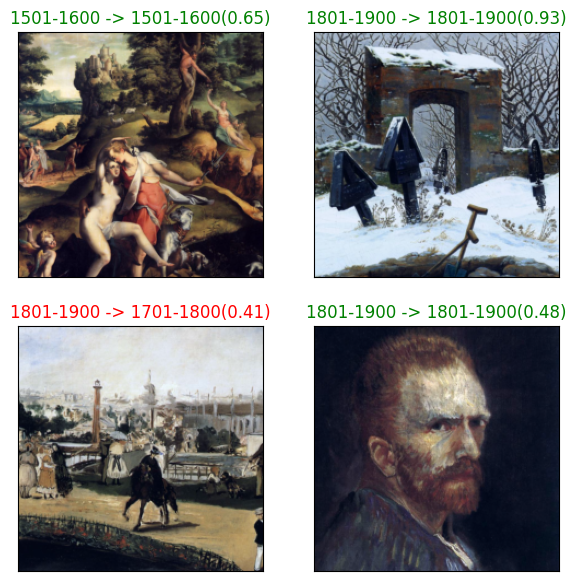

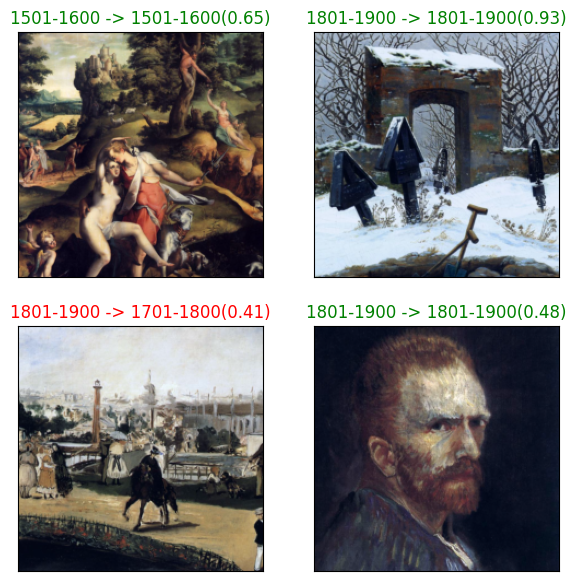

In [126]:
# Get the time frame model with grouping
model_path, encoder, output = models_[-1]
model = CNN(len(set(encoder.values())))
model.load_state_dict(torch.load(model_path, weights_only=True))
model.eval()
model.to(device)
# Show some pictures from the validation set
images, labels = next(iter(validation_dataloader))


def plot_class_prediction_reverse_encoder(net, images, labels):
    preds = net(images)
    probs = F.softmax(preds, dim=1)
    fig = plt.figure(figsize=(7, 7))
    labels = labels.cpu().numpy()
    images = images.cpu()
    probs = probs.cpu().detach().numpy()
    for idx in np.arange(4):
        ax = fig.add_subplot(2, 2, idx + 1, xticks=[], yticks=[])
        idx = idx + 6
        image = images[idx].numpy().transpose(1, 2, 0)
        image = (image - image.min()) / (image.max() - image.min())
        ax.imshow(image)
        ax.set_title(
            f"{reverse_encoder[labels[idx]]} -> {reverse_encoder[probs[idx].argmax()]}({probs[idx].max():.2f})",
            color=("green" if probs[idx].argmax() == labels[idx] else "red"),
        )
    return fig


plot_class_prediction_reverse_encoder(model, images, labels)

# MobileNetV2

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from torchvision import transforms
import zipfile
from sklearn.metrics import confusion_matrix
import seaborn as sns
from PIL import Image
from torchvision import transforms
from torchvision.transforms.functional import (
    to_pil_image,
)  # for seeing the image of obs i
import torch
import torch.utils.data as data
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    load_img,
    img_to_array,
)
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input

import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.metrics import precision_score
from tensorflow.keras.models import load_model

In [10]:
# Load preprocessed data
train_image = np.load("train_images.npy")
test_image = np.load("test_images.npy")
val_image = np.load("val_images.npy")
# train_timeframes = np.load("train_timeframes.npy")
# test_timeframes = np.load("test_timeframes.npy")
# val_timeframes = np.load("val_timeframes.npy")

train_schools = np.load("train_schools.npy")
test_schools = np.load("test_schools.npy")
val_schools = np.load("val_schools.npy")

# train_types = np.load("train_types.npy")
# test_types = np.load("test_types.npy")
# val_types = np.load("val_types.npy")

# School

## Ungrouped

In [30]:
school_encoder = {
    "American": 0,
    "Austrian": 1,
    "Belgian": 2,
    "Bohemian": 3,
    "Danish": 4,
    "Dutch": 5,
    "English": 6,
    "Flemish": 7,
    "French": 8,
    "German": 9,
    "Hungarian": 10,
    "Irish": 11,
    "Italian": 12,
    "Netherlandish": 13,
    "Other": 14,
    "Polish": 15,
    "Portuguese": 16,
    "Russian": 17,
    "Scottish": 18,
    "Spanish": 19,
    "Swedish": 20,
    "Swiss": 21,
    "Catalan": 22,
    "Finnish": 23,
    "Norwegian": 24,
    "Greek": 25,
}
train_schools_new = pd.Series(train_schools).map(school_encoder).to_numpy()
test_schools_new = pd.Series(test_schools).map(school_encoder).to_numpy()
val_schools_new = pd.Series(val_schools).map(school_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(26, activation="softmax")(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(
    optimizer="adam", loss=losses.sparse_categorical_crossentropy, metrics=["accuracy"]
)

In [7]:
history = head_model.fit(
    train_image,
    train_schools_new,
    batch_size=64,
    epochs=10,
    validation_data=(test_image, test_schools_new),
)

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.3423 - loss: 2.3742 - val_accuracy: 0.4331 - val_loss: 1.7990
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.4277 - loss: 1.8628 - val_accuracy: 0.4668 - val_loss: 1.7452
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.4560 - loss: 1.7707 - val_accuracy: 0.4649 - val_loss: 1.7177
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 552s 2s/step - accuracy: 0.4598 - loss: 1.7340 - val_accuracy: 0.4612 - val_loss: 1.7052
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1514s 5s/step - accuracy: 0.4643 - loss: 1.7187 - val_accuracy: 0.4715 - val_loss: 1.6760
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 473s 2s/step - accuracy: 0.4743 - loss: 1.6753 - val_accuracy: 0.4696 - val_loss: 1.6572
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.4832 - loss: 1.6389 - val_accuracy: 0.4724 - val_loss: 1.6468
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 0.4851 - loss: 1.6377 - val_acc

In [28]:
head_model.save("school_ungrouped_model.keras")
# head_model = load_model('school_ungrouped_model.keras')

### Statistics

In [57]:
head_model = load_model("school_ungrouped_model.keras")
school_encoder = {
    "American": 0,
    "Austrian": 1,
    "Belgian": 2,
    "Bohemian": 3,
    "Danish": 4,
    "Dutch": 5,
    "English": 6,
    "Flemish": 7,
    "French": 8,
    "German": 9,
    "Hungarian": 10,
    "Irish": 11,
    "Italian": 12,
    "Netherlandish": 13,
    "Other": 14,
    "Polish": 15,
    "Portuguese": 16,
    "Russian": 17,
    "Scottish": 18,
    "Spanish": 19,
    "Swedish": 20,
    "Swiss": 21,
    "Catalan": 22,
    "Finnish": 23,
    "Norwegian": 24,
    "Greek": 25,
}
train_schools_new = pd.Series(train_schools).map(school_encoder).to_numpy()
test_schools_new = pd.Series(test_schools).map(school_encoder).to_numpy()
val_schools_new = pd.Series(val_schools).map(school_encoder).to_numpy()

In [59]:
# Evaluate the model on the validation data
val_loss, val_accuracy = head_model.evaluate(val_image, val_schools_new)

# Print the results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 28s 653ms/step - accuracy: 0.5009 - loss: 1.5974
Validation Loss: 1.57777738571167
Validation Accuracy: 49.67%


34/34 ━━━━━━━━━━━━━━━━━━━━ 31s 808ms/step
Class 0 Accuracy: 0.00%
Class 1 Accuracy: 0.00%
Class 2 Accuracy: 0.00%
Class 3 Accuracy: 0.00%
Class 4 Accuracy: 0.00%
Class 5 Accuracy: 69.62%
Class 6 Accuracy: 0.00%
Class 7 Accuracy: 6.30%
Class 8 Accuracy: 3.23%
Class 9 Accuracy: 0.00%
Class 10 Accuracy: 0.00%
Class 11 Accuracy: 0.00%
Class 12 Accuracy: 94.87%
Class 13 Accuracy: 0.00%
Class 14 Accuracy: 0.00%
Class 16 Accuracy: 0.00%
Class 17 Accuracy: 0.00%
Class 18 Accuracy: 0.00%
Class 19 Accuracy: 2.17%
Class 21 Accuracy: 0.00%
Class 22 Accuracy: 0.00%
Class 24 Accuracy: 0.00%
Class Distribution in Validation Set:
0      10
1      10
2       1
3       1
4       6
5     158
6      21
7     127
8     155
9      59
10     11
11      1
12    429
13     17
14      2
16      1
17      6
18      2
19     46
21      4
22      1
24      1
Name: count, dtype: int64


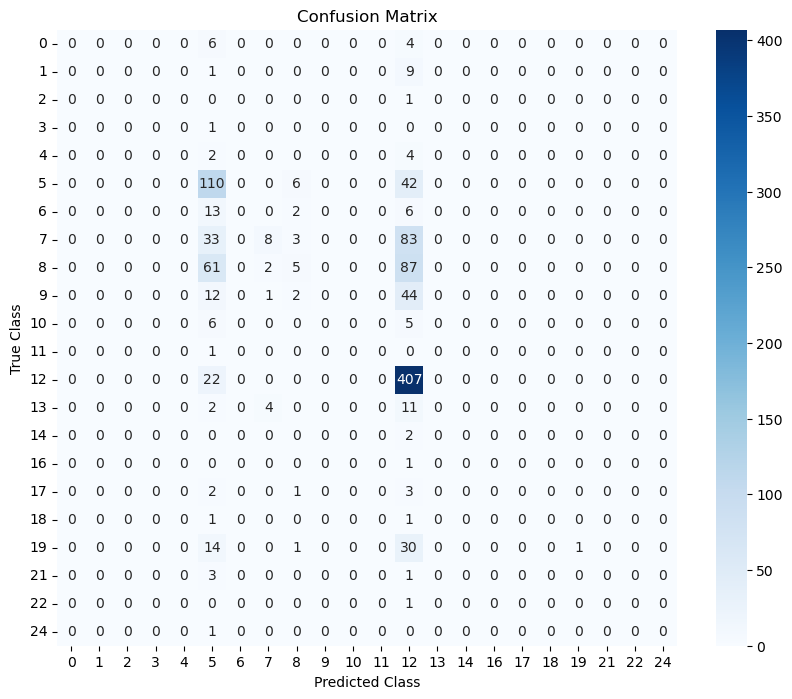

In [61]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_schools_new):
    class_indices = np.where(val_schools_new == class_label)[0]
    true_labels = val_schools_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")

np.unique(val_schools_new)

class_counts = pd.Series(val_schools_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_schools_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_counts.index,
    yticklabels=class_counts.index,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.xticks()
plt.yticks(rotation=360)
plt.show()

## Grouped

In [4]:
school_encoder = {
    "American": 0,
    "Austrian": 4,
    "Belgian": 4,
    "Bohemian": 3,
    "Danish": 1,
    "Dutch": 4,
    "English": 4,
    "Flemish": 4,
    "French": 4,
    "German": 4,
    "Hungarian": 3,
    "Irish": 4,
    "Italian": 2,
    "Netherlandish": 4,
    "Other": 5,
    "Polish": 3,
    "Portuguese": 2,
    "Russian": 3,
    "Scottish": 4,
    "Spanish": 2,
    "Swedish": 1,
    "Swiss": 4,
    "Catalan": 2,
    "Finnish": 1,
    "Norwegian": 1,
    "Greek": 2,
}
train_schools_new = pd.Series(train_schools).map(school_encoder).to_numpy()
test_schools_new = pd.Series(test_schools).map(school_encoder).to_numpy()
val_schools_new = pd.Series(val_schools).map(school_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation="softmax")(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(
    optimizer="adam", loss=losses.sparse_categorical_crossentropy, metrics=["accuracy"]
)

In [5]:
history = head_model.fit(
    train_image,
    train_schools_new,
    batch_size=64,
    epochs=10,
    validation_data=(test_image, test_schools_new),
)

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.5532 - loss: 1.0801 - val_accuracy: 0.6857 - val_loss: 0.7236
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.6621 - loss: 0.7791 - val_accuracy: 0.7063 - val_loss: 0.6933
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 450s 1s/step - accuracy: 0.6864 - loss: 0.7280 - val_accuracy: 0.7035 - val_loss: 0.6933
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - accuracy: 0.6916 - loss: 0.7037 - val_accuracy: 0.7212 - val_loss: 0.6646
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.7081 - loss: 0.6861 - val_accuracy: 0.7119 - val_loss: 0.6609
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.7155 - loss: 0.6666 - val_accuracy: 0.7203 - val_loss: 0.6538
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 422s 1s/step - accuracy: 0.7248 - loss: 0.6541 - val_accuracy: 0.7222 - val_loss: 0.6463
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 423s 1s/step - accuracy: 0.7242 - loss: 0.6632 - val_accu

In [9]:
head_model.save("school_grouped_model.keras")
# head_model = load_model('school_grouped_model.keras')

### Statistics

In [17]:
head_model = load_model("school_grouped_model.keras")
school_encoder = {
    "American": 0,
    "Austrian": 4,
    "Belgian": 4,
    "Bohemian": 3,
    "Danish": 1,
    "Dutch": 4,
    "English": 4,
    "Flemish": 4,
    "French": 4,
    "German": 4,
    "Hungarian": 3,
    "Irish": 4,
    "Italian": 2,
    "Netherlandish": 4,
    "Other": 5,
    "Polish": 3,
    "Portuguese": 2,
    "Russian": 3,
    "Scottish": 4,
    "Spanish": 2,
    "Swedish": 1,
    "Swiss": 4,
    "Catalan": 2,
    "Finnish": 1,
    "Norwegian": 1,
    "Greek": 2,
}
train_schools_new = pd.Series(train_schools).map(school_encoder).to_numpy()
test_schools_new = pd.Series(test_schools).map(school_encoder).to_numpy()
val_schools_new = pd.Series(val_schools).map(school_encoder).to_numpy()

In [19]:
val_loss, val_accuracy = head_model.evaluate(val_image, val_schools_new)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 769ms/step - accuracy: 0.7595 - loss: 0.6680
Validation Loss: 0.6736687421798706
Validation Accuracy: 74.93%


34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 915ms/step
Class 0 Accuracy: 0.00%
Class 1 Accuracy: 0.00%
Class 2 Accuracy: 79.04%
Class 3 Accuracy: 0.00%
Class 4 Accuracy: 76.40%
Class 5 Accuracy: 0.00%
Class Distribution in Validation Set:
0     10
1      7
2    477
3     18
4    555
5      2
Name: count, dtype: int64


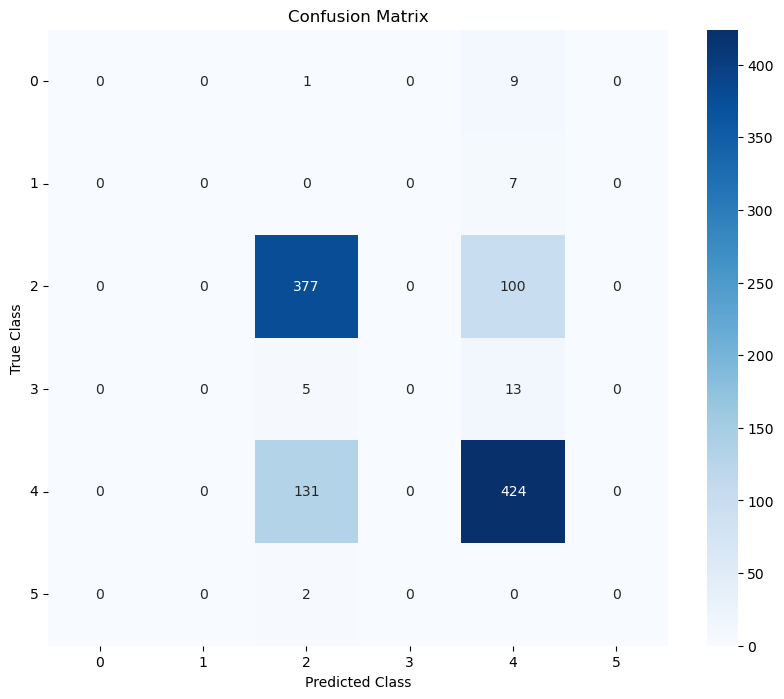

In [20]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_schools_new):
    class_indices = np.where(val_schools_new == class_label)[0]
    true_labels = val_schools_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")

np.unique(val_schools_new)

class_counts = pd.Series(val_schools_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_schools_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_counts.index,
    yticklabels=class_counts.index,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.xticks()
plt.yticks(rotation=360)
plt.show()

# Type

In [3]:
type_encoder = {
    "genre": 0,
    "historical": 1,
    "interior": 2,
    "landscape": 3,
    "mythological": 4,
    "other": 5,
    "portrait": 6,
    "religious": 7,
    "still-life": 8,
    "study": 9,
}
train_types_new = pd.Series(train_types).map(type_encoder).to_numpy()
test_types_new = pd.Series(test_types).map(type_encoder).to_numpy()
val_types_new = pd.Series(val_types).map(type_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation="softmax")(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(
    optimizer="adam", loss=losses.sparse_categorical_crossentropy, metrics=["accuracy"]
)

In [4]:
history = head_model.fit(
    train_image,
    train_types_new,
    batch_size=64,
    epochs=10,
    validation_data=(test_image, test_types_new),
)

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 719s 2s/step - accuracy: 0.4468 - loss: 1.7286 - val_accuracy: 0.6520 - val_loss: 1.0764
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.6172 - loss: 1.2367 - val_accuracy: 0.6773 - val_loss: 0.9795
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 445s 1s/step - accuracy: 0.6427 - loss: 1.1380 - val_accuracy: 0.6754 - val_loss: 0.9658
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 1629s 5s/step - accuracy: 0.6563 - loss: 1.0750 - val_accuracy: 0.6904 - val_loss: 0.9358
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.6647 - loss: 1.0484 - val_accuracy: 0.7016 - val_loss: 0.9189
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 407s 1s/step - accuracy: 0.6685 - loss: 1.0475 - val_accuracy: 0.7044 - val_loss: 0.9112
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.6763 - loss: 1.0178 - val_accuracy: 0.7091 - val_loss: 0.9120
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.6846 - loss: 0.9998 - val_acc

In [9]:
head_model.save("type_model.keras")
# head_model = load_model('type_model.keras')

## Statistics

In [4]:
head_model = load_model("type_model.keras")
type_encoder = {
    "genre": 0,
    "historical": 1,
    "interior": 2,
    "landscape": 3,
    "mythological": 4,
    "other": 5,
    "portrait": 6,
    "religious": 7,
    "still-life": 8,
    "study": 9,
}
train_types_new = pd.Series(train_types).map(type_encoder).to_numpy()
test_types_new = pd.Series(test_types).map(type_encoder).to_numpy()
val_types_new = pd.Series(val_types).map(type_encoder).to_numpy()

In [5]:
# Evaluate the model on the validation data
val_loss, val_accuracy = head_model.evaluate(val_image, val_types_new)

# Print the results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 859ms/step - accuracy: 0.6893 - loss: 0.9213
Validation Loss: 0.9161749482154846
Validation Accuracy: 69.41%


34/34 ━━━━━━━━━━━━━━━━━━━━ 33s 823ms/step
Class 0 Accuracy: 14.89%
Class 1 Accuracy: 0.00%
Class 2 Accuracy: 70.00%
Class 3 Accuracy: 91.34%
Class 4 Accuracy: 19.15%
Class 5 Accuracy: 0.00%
Class 6 Accuracy: 83.89%
Class 7 Accuracy: 88.26%
Class 8 Accuracy: 92.00%
Class 9 Accuracy: 0.00%
Class Distribution in Validation Set:
0     94
1     34
2     30
3    127
4     94
5     32
6    180
7    426
8     50
9      2
Name: count, dtype: int64


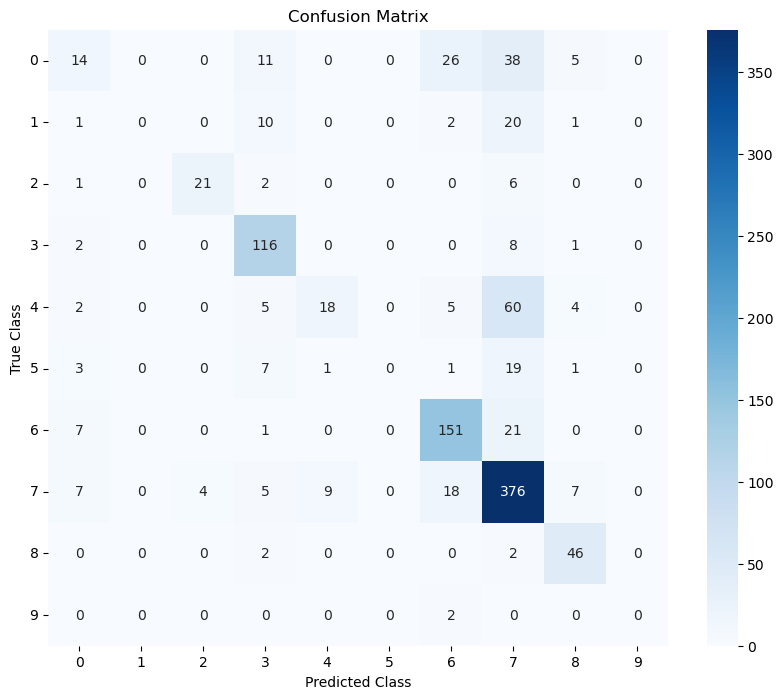

In [14]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_types_new):
    class_indices = np.where(val_types_new == class_label)[0]
    true_labels = val_types_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")

np.unique(val_types_new)

class_counts = pd.Series(val_types_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_types_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_counts.index,
    yticklabels=class_counts.index,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.xticks()
plt.yticks(rotation=360)
plt.show()

# Timeframe

## Ungrouped

In [3]:
timeframe_encoder = {
    "0801-0850": 0,
    "0851-0900": 1,
    "0751-0800": 2,
    "0951-1000": 3,
    "1001-1050": 4,
    "1051-1100": 5,
    "1101-1150": 6,
    "1151-1200": 7,
    "1201-1250": 8,
    "1251-1300": 9,
    "1301-1350": 10,
    "1351-1400": 11,
    "1401-1450": 12,
    "1451-1500": 13,
    "1501-1550": 14,
    "1551-1600": 15,
    "1601-1650": 16,
    "1651-1700": 17,
    "1701-1750": 18,
    "1751-1800": 19,
    "1801-1850": 20,
    "1851-1900": 21,
}
train_timeframes_new = pd.Series(train_timeframes).map(timeframe_encoder).to_numpy()
test_timeframes_new = pd.Series(test_timeframes).map(timeframe_encoder).to_numpy()
val_timeframes_new = pd.Series(val_timeframes).map(timeframe_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(22, activation="softmax")(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(
    optimizer="adam", loss=losses.sparse_categorical_crossentropy, metrics=["accuracy"]
)

In [4]:
history = head_model.fit(
    train_image,
    train_timeframes_new,
    batch_size=64,
    epochs=10,
    validation_data=(test_image, test_timeframes_new),
)

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 449s 1s/step - accuracy: 0.1502 - loss: 2.7066 - val_accuracy: 0.3022 - val_loss: 2.0662
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 428s 1s/step - accuracy: 0.2558 - loss: 2.1553 - val_accuracy: 0.2984 - val_loss: 1.9065
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.2861 - loss: 2.0053 - val_accuracy: 0.3293 - val_loss: 1.8672
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - accuracy: 0.3017 - loss: 1.9455 - val_accuracy: 0.3283 - val_loss: 1.8307
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3213 - loss: 1.8824 - val_accuracy: 0.3573 - val_loss: 1.8095
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 434s 1s/step - accuracy: 0.3295 - loss: 1.8554 - val_accuracy: 0.3545 - val_loss: 1.7910
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3424 - loss: 1.8233 - val_accuracy: 0.3424 - val_loss: 1.7815
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.3407 - loss: 1.8082 - val_accu

In [13]:
head_model.save("timeframe_ungrouped_model.keras")
# head_model = load_model('timeframe_ungrouped_model.keras')

### Statistics

In [ ]:
head_model = load_model("timeframe_ungrouped_model.keras")
timeframe_encoder = {
    "0801-0850": 0,
    "0851-0900": 1,
    "0751-0800": 2,
    "0951-1000": 3,
    "1001-1050": 4,
    "1051-1100": 5,
    "1101-1150": 6,
    "1151-1200": 7,
    "1201-1250": 8,
    "1251-1300": 9,
    "1301-1350": 10,
    "1351-1400": 11,
    "1401-1450": 12,
    "1451-1500": 13,
    "1501-1550": 14,
    "1551-1600": 15,
    "1601-1650": 16,
    "1651-1700": 17,
    "1701-1750": 18,
    "1751-1800": 19,
    "1801-1850": 20,
    "1851-1900": 21,
}
train_timeframes_new = pd.Series(train_timeframes).map(timeframe_encoder).to_numpy()
test_timeframes_new = pd.Series(test_timeframes).map(timeframe_encoder).to_numpy()
val_timeframes_new = pd.Series(val_timeframes).map(timeframe_encoder).to_numpy()


In [15]:
# Evaluate the model on the validation data
val_loss, val_accuracy = head_model.evaluate(val_image, val_timeframes_new)

# Print the results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 4561s 138s/step - accuracy: 0.4007 - loss: 1.7363
Validation Loss: 1.7336708307266235
Validation Accuracy: 39.38%


34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 685ms/step
Class 5 Accuracy: 0.00%
Class 6 Accuracy: 0.00%
Class 7 Accuracy: 0.00%
Class 9 Accuracy: 0.00%
Class 10 Accuracy: 51.52%
Class 11 Accuracy: 0.00%
Class 12 Accuracy: 0.00%
Class 13 Accuracy: 53.92%
Class 14 Accuracy: 52.41%
Class 15 Accuracy: 2.17%
Class 16 Accuracy: 72.20%
Class 17 Accuracy: 22.02%
Class 18 Accuracy: 35.00%
Class 19 Accuracy: 9.68%
Class 20 Accuracy: 0.00%
Class 21 Accuracy: 68.42%
Class Distribution in Validation Set:
5       2
6       3
7       2
9      11
10     33
11     21
12     44
13    102
14    145
15     92
16    205
17    109
18     80
19     62
20     63
21     95
Name: count, dtype: int64


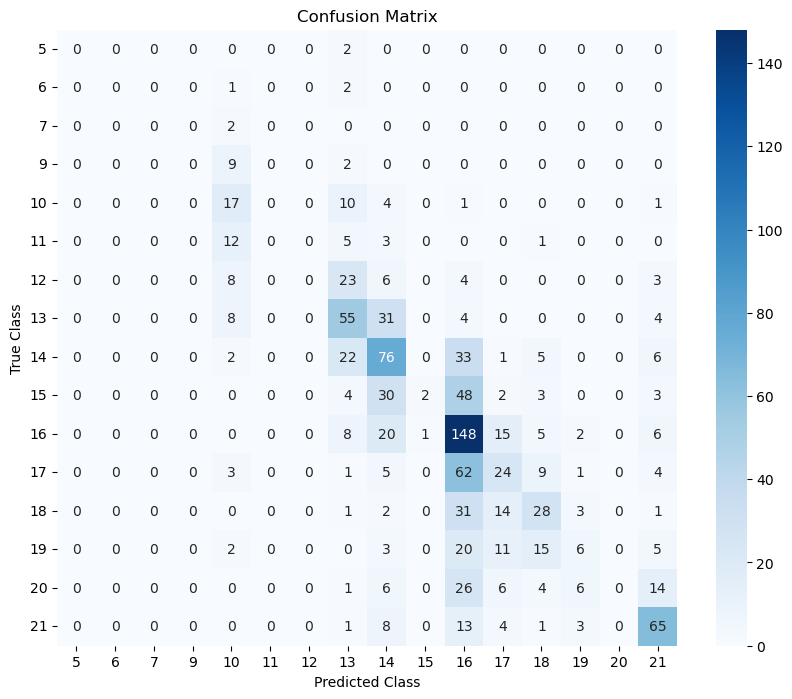

In [16]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_timeframes_new):
    class_indices = np.where(val_timeframes_new == class_label)[0]
    true_labels = val_timeframes_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")

np.unique(val_timeframes_new)

class_counts = pd.Series(val_timeframes_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_timeframes_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_counts.index,
    yticklabels=class_counts.index,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.xticks()
plt.yticks(rotation=360)
plt.show()

## Grouped

In [23]:
timeframe_encoder = {
    "0801-0850": 0,
    "0851-0900": 0,
    "0751-0800": 0,
    "0951-1000": 0,
    "1001-1050": 0,
    "1051-1100": 0,
    "1101-1150": 0,
    "1151-1200": 0,
    "1201-1250": 0,
    "1251-1300": 0,
    "1301-1350": 0,
    "1351-1400": 0,
    "1401-1450": 1,
    "1451-1500": 1,
    "1501-1550": 2,
    "1551-1600": 2,
    "1601-1650": 3,
    "1651-1700": 3,
    "1701-1750": 4,
    "1751-1800": 4,
    "1801-1850": 5,
    "1851-1900": 5,
}
train_timeframes_new = pd.Series(train_timeframes).map(timeframe_encoder).to_numpy()
test_timeframes_new = pd.Series(test_timeframes).map(timeframe_encoder).to_numpy()
val_timeframes_new = pd.Series(val_timeframes).map(timeframe_encoder).to_numpy()

base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(224, 224, 3)
)
for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(
    base_model.output
)  # has no weights unlike convolutional layers
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(6, activation="softmax")(x)
head_model = Model(inputs=base_model.input, outputs=predictions)
head_model.compile(
    optimizer="adam", loss=losses.sparse_categorical_crossentropy, metrics=["accuracy"]
)

In [25]:
history = head_model.fit(
    train_image,
    train_timeframes_new,
    batch_size=64,
    epochs=10,
    validation_data=(test_image, test_timeframes_new),
)

Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 666s 2s/step - accuracy: 0.2850 - loss: 1.7220 - val_accuracy: 0.4238 - val_loss: 1.3764
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - accuracy: 0.4137 - loss: 1.4030 - val_accuracy: 0.4677 - val_loss: 1.2909
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - accuracy: 0.4565 - loss: 1.3209 - val_accuracy: 0.4808 - val_loss: 1.2281
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.4750 - loss: 1.2598 - val_accuracy: 0.5070 - val_loss: 1.2065
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - accuracy: 0.4942 - loss: 1.2236 - val_accuracy: 0.4949 - val_loss: 1.1946
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 552s 2s/step - accuracy: 0.4926 - loss: 1.2196 - val_accuracy: 0.5080 - val_loss: 1.1706
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.5015 - loss: 1.1761 - val_accuracy: 0.5051 - val_loss: 1.1622
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 511s 2s/step - accuracy: 0.5046 - loss: 1.1734 - val_accu

In [29]:
head_model.save("timeframe_grouped_model.keras")
# head_model = load_model('timeframe_grouped_model.keras')

### Statistics

In [31]:
head_model = load_model("timeframe_grouped_model.keras")
timeframe_encoder = {
    "0801-0850": 0,
    "0851-0900": 0,
    "0751-0800": 0,
    "0951-1000": 0,
    "1001-1050": 0,
    "1051-1100": 0,
    "1101-1150": 0,
    "1151-1200": 0,
    "1201-1250": 0,
    "1251-1300": 0,
    "1301-1350": 0,
    "1351-1400": 0,
    "1401-1450": 1,
    "1451-1500": 1,
    "1501-1550": 2,
    "1551-1600": 2,
    "1601-1650": 3,
    "1651-1700": 3,
    "1701-1750": 4,
    "1751-1800": 4,
    "1801-1850": 5,
    "1851-1900": 5,
}
train_timeframes_new = pd.Series(train_timeframes).map(timeframe_encoder).to_numpy()
test_timeframes_new = pd.Series(test_timeframes).map(timeframe_encoder).to_numpy()
val_timeframes_new = pd.Series(val_timeframes).map(timeframe_encoder).to_numpy()

In [32]:
# Evaluate the model on the validation data
val_loss, val_accuracy = head_model.evaluate(val_image, val_timeframes_new)

# Print the results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 832ms/step - accuracy: 0.5627 - loss: 1.1172
Validation Loss: 1.1183010339736938
Validation Accuracy: 54.82%


34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step
Class 0 Accuracy: 22.22%
Class 1 Accuracy: 69.18%
Class 2 Accuracy: 52.32%
Class 3 Accuracy: 80.89%
Class 4 Accuracy: 16.90%
Class 5 Accuracy: 42.41%
Class Distribution in Validation Set:
0     72
1    146
2    237
3    314
4    142
5    158
Name: count, dtype: int64


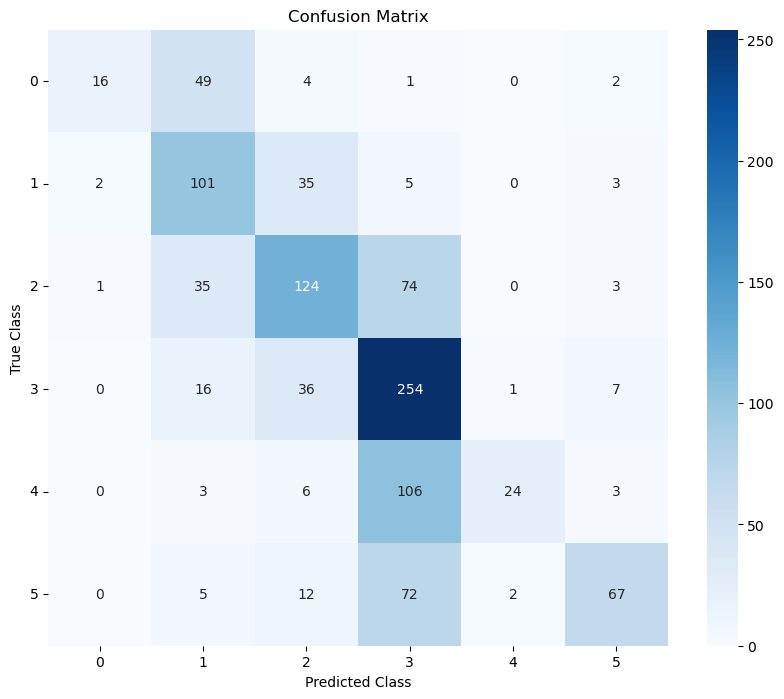

In [36]:
val_predictions = head_model.predict(val_image)
val_predicted_classes = np.argmax(val_predictions, axis=1)

class_accuracies = {}
for class_label in np.unique(val_timeframes_new):
    class_indices = np.where(val_timeframes_new == class_label)[0]
    true_labels = val_timeframes_new[class_indices]
    predicted_labels = val_predicted_classes[class_indices]
    class_accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
    class_accuracies[class_label] = class_accuracy * 100

for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy:.2f}%")

np.unique(val_timeframes_new)

class_counts = pd.Series(val_timeframes_new).value_counts().sort_index()
print("Class Distribution in Validation Set:")
print(class_counts)

cm = confusion_matrix(val_timeframes_new, val_predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_counts.index,
    yticklabels=class_counts.index,
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.xticks()
plt.yticks(rotation=360)
plt.show()